<a href="https://colab.research.google.com/github/sspaulc/EDA--ABTN0105-Play-Store-App-Review-Analysis/blob/main/Sanchita_Paul_Play_Store_App_Review_Analysis_%5BABTN0105%5D_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
#import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#mount the drive and import csv files into different data frames
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
playstore_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Almabetter/Module 1/Week 4/Day 3/Play Store Data.csv")

In [4]:
user_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Almabetter/Module 1/Week 4/Day 3/User Reviews.csv")

In [5]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
playstore_df_no_duplicates= playstore_df.drop_duplicates().reset_index()

In [7]:
playstore_df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10358 non-null  int64  
 1   App             10358 non-null  object 
 2   Category        10358 non-null  object 
 3   Rating          8893 non-null   float64
 4   Reviews         10358 non-null  object 
 5   Size            10358 non-null  object 
 6   Installs        10358 non-null  object 
 7   Type            10357 non-null  object 
 8   Price           10358 non-null  object 
 9   Content Rating  10357 non-null  object 
 10  Genres          10358 non-null  object 
 11  Last Updated    10358 non-null  object 
 12  Current Ver     10350 non-null  object 
 13  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.1+ MB


In [9]:
#Convert the string row to integers

def convert_string_integers(installs):
  '''This function coverts all the string elements to integer in the install column'''
  str_installs=""
  installs_list=installs.split(",")
  for item in installs_list:
    #iterate over the list
    str_installs=str_installs+ item
  try:
    int_installs= int(str_installs[:-1])
    return int_installs #
  except ValueError:
    #For '' strings 
    return 0

In [10]:

playstore_df_no_duplicates['Int_Installs']= playstore_df_no_duplicates['Installs'].apply(convert_string_integers)

In [11]:
playstore_df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10358 non-null  int64  
 1   App             10358 non-null  object 
 2   Category        10358 non-null  object 
 3   Rating          8893 non-null   float64
 4   Reviews         10358 non-null  object 
 5   Size            10358 non-null  object 
 6   Installs        10358 non-null  object 
 7   Type            10357 non-null  object 
 8   Price           10358 non-null  object 
 9   Content Rating  10357 non-null  object 
 10  Genres          10358 non-null  object 
 11  Last Updated    10358 non-null  object 
 12  Current Ver     10350 non-null  object 
 13  Android Ver     10355 non-null  object 
 14  Int_Installs    10358 non-null  int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.2+ MB


In [12]:
#Drop the duplicate values in the data set.

In [13]:
playstore_df_no_duplicates.drop_duplicates(subset= 'App',keep= 'first',inplace=True)


In [14]:
playstore_df_no_duplicates.shape

(9660, 15)

In [16]:
plt.rcParams["figure.figsize"]=(10,7.5)

Text(0.5, 1.0, 'Density OF Ratings')

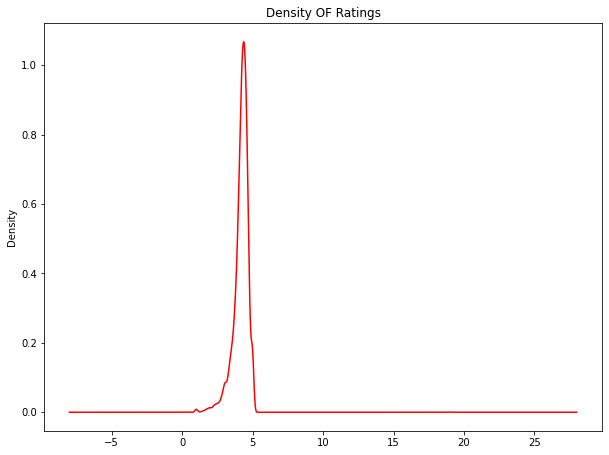

In [17]:
#Use Density Plot to check where most of the reviews lie

rating= playstore_df_no_duplicates['Rating']

rating.plot.density(color= "red")
plt.title('Density OF Ratings')

In [18]:
import seaborn as sns


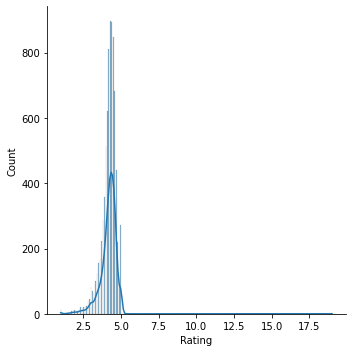

In [19]:
sns.displot(playstore_df_no_duplicates['Rating'],kde= True )

In [20]:
playstore_df_no_duplicates['Rating'].value_counts().head(5)

4.3    897
4.4    895
4.5    848
4.2    810
4.6    683
Name: Rating, dtype: int64

The maximum number of ratings lie in the range of 4.2 and 4.6.

Question 1: What is the overall sentiment among the users?

In [21]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [23]:
sentiment= user_df['Sentiment'] #take an instance of the series

In [25]:
sentiments=sentiment.dropna() #Drop the null values

In [26]:
sentiments.value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [27]:
sentiments.value_counts('Negative')*100

Positive    64.110921
Negative    22.096068
Neutral     13.793011
Name: Sentiment, dtype: float64

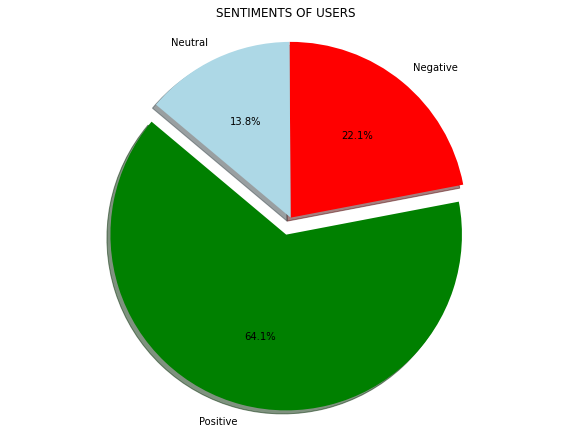

In [28]:
# Data to plot
labels = 'Positive', 'Negative','Neutral'
sizes = [64.11, 22.09, 13.79]
colors = ['green', 'red', 'lightblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('SENTIMENTS OF USERS')
plt.show()

As we can infer from the pie chart that overall the users have had a positive response to the apps. Which can also be twice confirmed from the maximum number of reviews lying between 4.2-4.6 .

This quantification of sentiment being more indicative towards positive can be used to infer the psychology of the users. There is a more positive outlook towards most of the products and thus an investment seems viable.

Q2: Now that we have seen that mostly the sentiment of the users,let us find the most readily available categories?

In [29]:
#Supply of apps depending on what category is most produced.

In [30]:
supply=playstore_df_no_duplicates['Category'].value_counts()

Text(0.5, 1.0, 'SUPPLY OF THE APPS DEPENDING ON THEIR CATEGORIES')

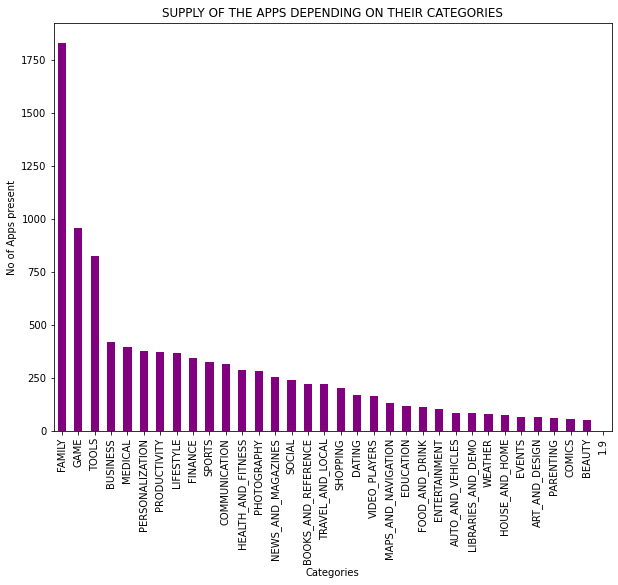

In [31]:
supply.plot(kind= 'bar',color= 'purple')
plt.xlabel('Categories')
plt.ylabel('No of Apps present')
plt.title('SUPPLY OF THE APPS DEPENDING ON THEIR CATEGORIES')

From the above bar graph,from each category we can infer that Category 'Family' and 'Games' are the most available.Thus we can also assume that these categories have a higher success rate with a higher supply rate.

In [32]:
#Demand of apps depending on the number of installments

In [34]:
demand= playstore_df_no_duplicates.groupby('Category')['Int_Installs'].sum().sort_values(ascending= False) #group by category according to installs and sorting in descending

In [35]:
#Standarddize demand 

In [36]:
demand= demand/10000000

In [37]:
demand.head(5)

Category
GAME             1387.892441
COMMUNICATION    1103.827625
TOOLS             800.177192
PRODUCTIVITY      579.309137
SOCIAL            548.786790
Name: Int_Installs, dtype: float64

Text(0.5, 1.0, 'DEMAND OF THE APPS DEPENDING ON THEIR CATEGORIES')

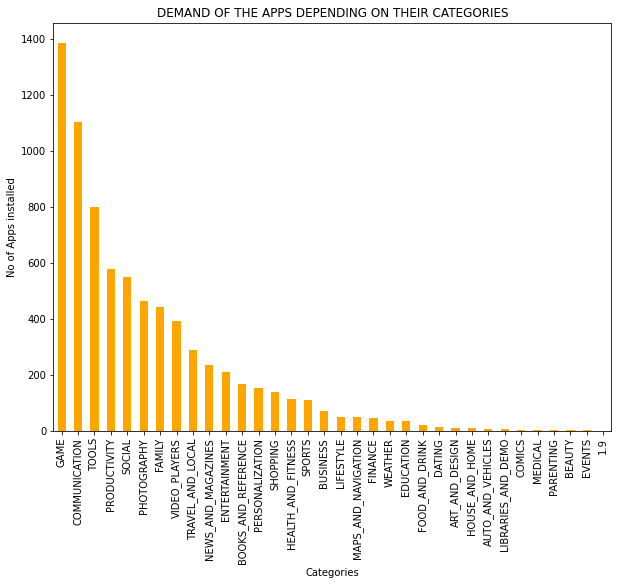

In [38]:
demand.plot(kind='bar',color='orange')
plt.xlabel('Categories')
plt.ylabel('No of Apps installed')
plt.title('DEMAND OF THE APPS DEPENDING ON THEIR CATEGORIES')

From the above graph we can clearly conclude the most popular categories as 'Game','Communcation','Tools'. Depending on the number of installments we can determine the demand of customers.

Q3: Now that we have the relationship of different categories with the demand and supply,lets try to find if there is any actual positive correlation between the two?

In [39]:
#Create a data frame

In [40]:
demand_supplys=pd.DataFrame({'Demand':demand, 'Supply': supply})

In [41]:
demand_supplys.head(5)

,Demand,Supply
1.9,0.000000,1
ART_AND_DESIGN,11.433810,64
AUTO_AND_VEHICLES,5.313021,85
BEAUTY,2.719705,53
BOOKS_AND_REFERENCE,166.596958,222


Text(0, 0.5, 'Standardized frequencies')

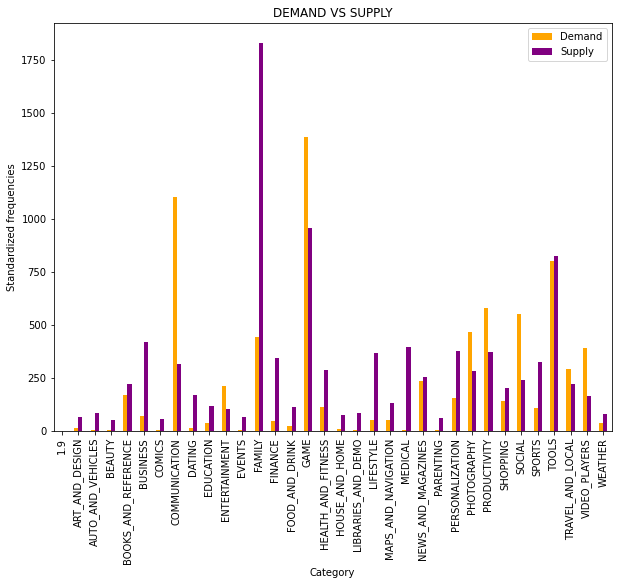

In [42]:
demand_supplys.plot(kind='bar',color=['orange','purple'])
plt.title('DEMAND VS SUPPLY')
plt.xlabel('Category')
plt.ylabel('Standardized frequencies')

In most categories the number of installs is pretty much relevant to the number of apps present as in there is a maximum number of installs in those categories. But in some categories the number of available apps are much higher than the actual demand of the apps.

To get a clearer picture of the demand and supply let us plot them on a line graph.

Text(0.5, 1.0, 'Demand vs Supply')

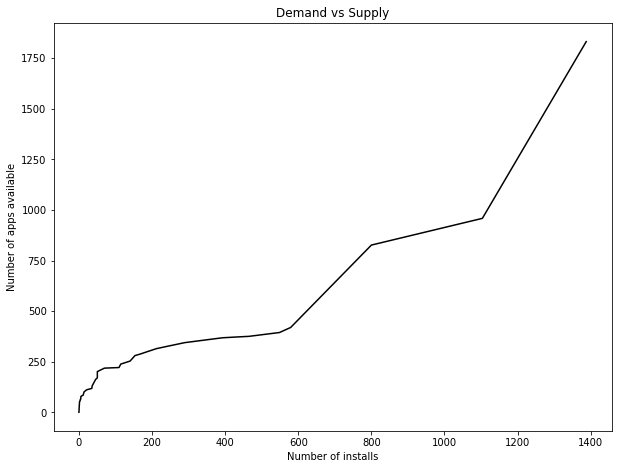

In [43]:
plt.plot(demand,supply,color='black')
plt.xlabel('Number of installs')
plt.ylabel('Number of apps available')
plt.title('Demand vs Supply')

From the above line plot we can determine that the relationahip between demand and supply is non-linear. It is not perfectly consistent but there is some hope for the increase in demand due to supply. We can conclude that there is a positive correlation and making future predictions seems viable.

Q4: What are the most popular apps in the market?

In [44]:
Apps_df=playstore_df_no_duplicates.groupby('App').agg({'Int_Installs':'sum', 'Rating':'median'}) #groupby playstore data by App on sum of Installs and median of the ratings

In [ ]:
#the top ten most installed.

In [45]:
top= Apps_df.sort_values(by= 'Int_Installs',ascending= False).head(10)

Text(0.5, 1.0, 'Trend of Ratings among the most popular Apps')

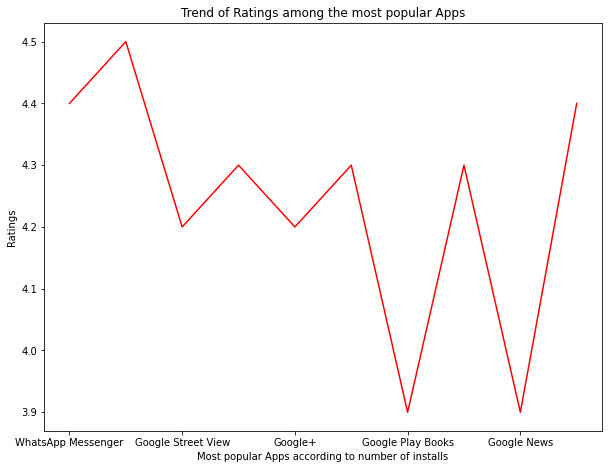

In [46]:
top['Rating'].plot(color="Red")
plt.xlabel('Most popular Apps according to number of installs')
plt.ylabel('Ratings')
plt.title('Trend of Ratings among the most popular Apps')

The 5 most popular apps in the playstore have an average rating between 3.9 and 4.5. Hence we can conclude from this that number of installations have a direct relationship with the Ratings. The higher the number of installations the higher chances of a good rating and hence a good experience of users.

 Q5:  What is the sentiment polarity of top apps?

In [174]:
#inner join the playstore data with user data. 

In [188]:
playstore_users_df=playstore_df_no_duplicates.merge(user_df, how= 'inner',on='App')

In [189]:
playstore_users_df.shape

(61556, 19)

In [190]:
playstore_user_no_duplicates=playstore_users_df.dropna()

In [191]:
playstore_user_no_duplicates.shape

(35929, 19)

In [ ]:
#Create data frame for the sentiments by grouping the Apps according to their installments,median of polarity and subjectivity

In [197]:
sentiment_apps=playstore_user_no_duplicates.groupby('App').agg({'Sentiment_Polarity':'median','Int_Installs':'sum','Sentiment_Subjectivity':'median'}) 

In [ ]:
#Get the most installed apps.

In [198]:
sentiment_apps.sort_values(by='Int_Installs',ascending= False).head(10)

,Sentiment_Polarity,Int_Installs,Sentiment_Subjectivity
App,,,
Google Photos,0.175000,191000000000,0.500000
Facebook,0.000000,132000000000,0.484091
Candy Crush Saga,-0.011023,120000000000,0.481629
Google News,0.139796,117000000000,0.516667
Hangouts,0.247917,114000000000,0.500000
Gmail,0.003745,64000000000,0.483424
Google,0.235000,38000000000,0.477525
Gboard - the Google Keyboard,0.035417,38000000000,0.525000
Dropbox,0.113154,38000000000,0.525000


In [199]:
top= sentiment_apps.sort_values(by='Int_Installs',ascending= False).head(10)

In [200]:
top['Int_Installs']= top['Int_Installs']/100000000000

Text(0.5, 1.0, 'Top installed Apps vs Sentiment Polarity and subjectivity')

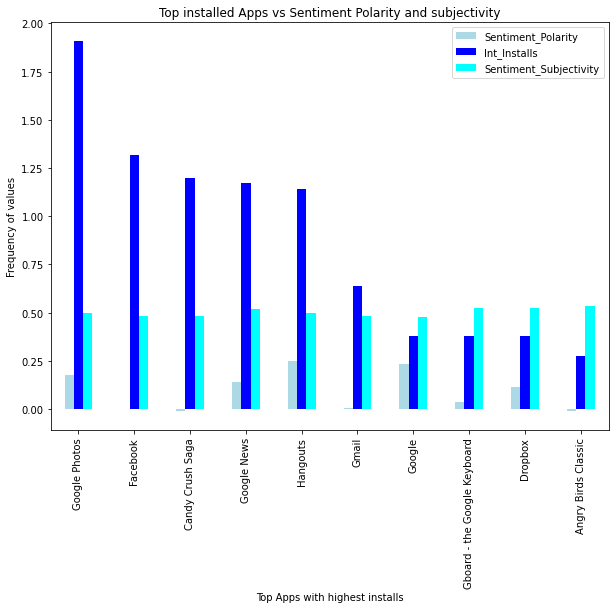

In [235]:
#Plot with bar graph
top.plot(kind='bar',color=['lightblue','blue','cyan'])
plt.xlabel('Top Apps with highest installs')
plt.ylabel('Frequency of values')
plt.title('Top installed Apps vs Sentiment Polarity and subjectivity')

From the above data and chart we can infer that the most installed apps have a polarity of sentiments towards positivity with the exceptions of Candy Cursh Saga and Angry Birds Classic having a more negative user outlook. And that the sentiments towards all these apps are mostly general.

In [233]:
#Convert the object type series to float

In [206]:
playstore_user_no_duplicates['Reviews']=playstore_user_no_duplicates['Reviews'].astype(dtype='float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Scale reviews according to polarity.

In [219]:
playstore_user_no_duplicates['Standardized_reviews']=playstore_user_no_duplicates['Reviews']/100000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [230]:
x=playstore_user_no_duplicates['Standardized_reviews']
y=playstore_user_no_duplicates['Sentiment_Polarity']

Text(0.5, 1.0, 'Sentiment Polarity vs Number of reviews')

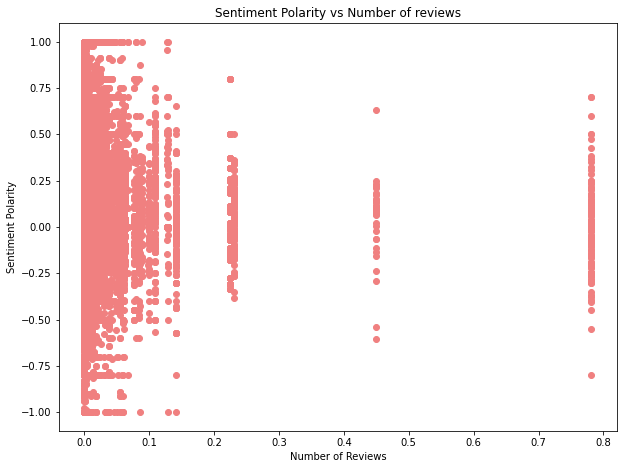

In [232]:
plt.scatter(x,y,color='lightcoral')
plt.xlabel('Number of Reviews')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity vs Number of reviews')


From the above plot we can determine that there is no definitive relationship between sentiment polarity and number of reviews. There is a lot of variance in the values of polarity with respect to the number of reviews.